# Step 2. Feature Selection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data Cleaning.csv')

## 2.1 Historical Credit Records

Text(0.5, 0.98, 'Risk of default with payment delay across four past periods')

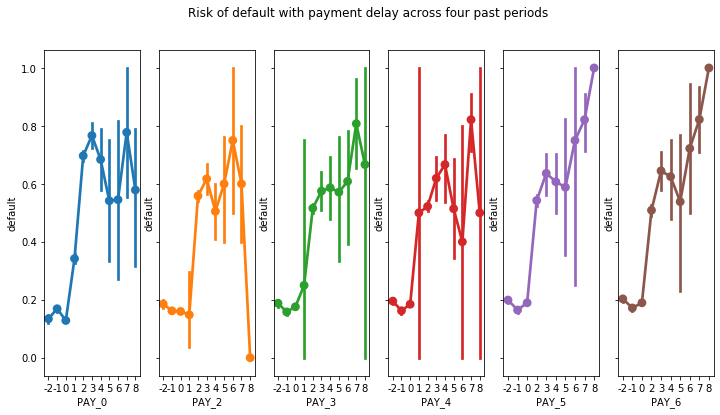

In [3]:
payment_delay_cols = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6']
fig, ax = plt.subplots(1, 6, figsize=(12, 6), sharey=True)
for i,(column, ax) in enumerate(zip(payment_delay_cols, ax)):
    sns.pointplot(x=column, y='default', data=df, ax=ax, color=sns.color_palette()[i])
plt.suptitle('Risk of default with payment delay across four past periods')

From the preceding chart we can see that if the payment delay for more than 2 months, there is a strong relation between default and historical credit records.

Text(0.5, 0.98, 'Risk of default with a timely payment or delay beyond a 2 or 3 month cut off')

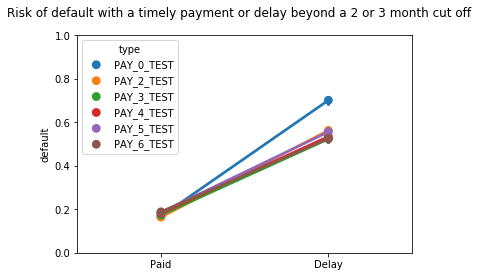

In [4]:
cutoff_point = {'PAY_0': 2,'PAY_2': 2, 'PAY_3': 2, 'PAY_4': 2, 'PAY_5': 2,'PAY_6': 2}
for column in cutoff_point.keys():
    df[column+'_TEST'] =  df[column].map(lambda x: 'Delay' if x >= cutoff_point[column] else 'Paid')

x = [i + '_TEST' for i in cutoff_point.keys()]
df_use = df[x].copy().unstack().reset_index()
df_use['default'] = df['default'].tolist()*6
df_use = df_use.rename(columns={'level_0':'type'})
sns.pointplot(x=0, y='default', data=df_use, order=['Paid', 'Delay'],hue='type')
plt.xlabel('')
plt.ylim(0, 1)
plt.suptitle('Risk of default with a timely payment or delay beyond a 2 or 3 month cut off')

## 2.2 Historical Bill Amount

In [5]:
# Considering the ratio of last month's amount of bill statement to the amount of the given credit can influence
# this month's default probability. So we take this ratio into consideration.
# Since we are going to predict September's default probability, so we only take October's ratio.
df['Limit_Usage']=df['BILL_AMT1']/df['LIMIT_BAL']

## 2.3 Historical Payment Amount

In [6]:
# Based on the understanding of the credit card business, we think the bigger coefficient of variation of 
# previous months, the higher probability of default.
df['Pay_Amt_std']=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].std(axis=1)/df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)
df['Pay_Amt_std']=df.Pay_Amt_std.fillna(0)

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,AGE_GROUP,LIMIT_BAL_GROUP,PAY_0_TEST,PAY_2_TEST,PAY_3_TEST,PAY_4_TEST,PAY_5_TEST,PAY_6_TEST,Limit_Usage,Pay_Amt_std
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,20s,0-50k,Delay,Delay,Paid,Paid,Paid,Paid,0.195650,2.449490
1,2,120000,Female,University,Single,26,-1,2,0,0,...,20s,100-150k,Paid,Delay,Paid,Paid,Paid,Delay,0.022350,0.903327
2,3,90000,Female,University,Single,34,0,0,0,0,...,30s,50-100k,Paid,Paid,Paid,Paid,Paid,Paid,0.324878,0.854864
3,4,50000,Female,University,Married,37,0,0,0,0,...,30s,0-50k,Paid,Paid,Paid,Paid,Paid,Paid,0.939800,0.341959
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,50s,0-50k,Paid,Paid,Paid,Paid,Paid,Paid,0.172340,1.400826


In [8]:
# Store the intermediate data.
df.to_csv('Feature Selection.csv', index = False)

:)